# UAS Data Science

## Wisconsin Breast Cancer Datasets

Pada pembelajaran ini akan dilakukan proses Classification yaitu untuk melakukan prediksi harga rumah menggunakan beberapa cara yaitu :
1. Naive Bayes
2. Decision Tree
3. Random Forest
4. Support Vector Machine
5. Binary Classification

### Mempersiapkan Dataset

Langkah pertama yang harus dilakukan adalah dengan melakukan load dataset. Cara untuk mengakses dataset: Kita dapat mengakses sebuah dataset dengan mengimport dataset terebut.

Dataset yang akan digunakan kali ini adalah dataset Wisconsin Breast Cancer Datasets. Berikut cara mengimport dataset dari sklearn:

In [175]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [176]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [177]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Kemudian untuk melihat breast cancer dataset dengan lebih jelas, maka di sini akan dilakukan load datasetnya menggunakan pandas sehingga hasilnya akan berbentuk kolom.

In [178]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_breast_cancer()
df_breast_cancer = pd.DataFrame(breast_cancer.data,columns=boston_data.feature_names)
df_breast_cancer['target'] = pd.Series(breast_cancer.target)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [179]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

## Training & Testing Dataset

Setelah dataset di load maka selanjutnya kita akan mentraining dan testing dataset yang dimiliki. Di sini dataset akan dibagi menjadi 2 yaitu training set dan testing set. Dan masing-masing dari testing dan training set akan memiliki X (features) dan Y (target).

In [180]:
X = breast_cancer.data
y = breast_cancer.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print(f'X train: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (341, 30)
X test: (228, 30)
y train: (341,)
y test: (228,)


## Perbandingan Breast Cancer Dataset dengan Classification Model:

Setelah dataset siap, maka selanjutnya akan digunakan 5 buah model classification untuk dilakukan perbandingan terhadap kelima model classification tersebut.

### 1. Naive Bayes Classification

Yang pertama kita akan menerapkan Naive Bayes untuk melakukan klasifikasi data pada dataset yang kita miliki.

Naive bayes menawarkan suatu formula untuk menghitung nilai probability dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi terkait atau sering kali dikenal dengan istilah conditional probability.

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9429824561403509

Kemudian akan dilakukan evaluasi terhadap model Naive Bayes yang telah dibuat, di sini akan digunakan classification report.

In [210]:
from sklearn.metrics import classification_report

y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        80
           1       0.96      0.95      0.96       148

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



Kemudian kita akan mencoba memvisualisasikan model Naive Bayes ini.

Text(0.5, 1.0, 'Visulasisasi Untuk Naive Bayes')

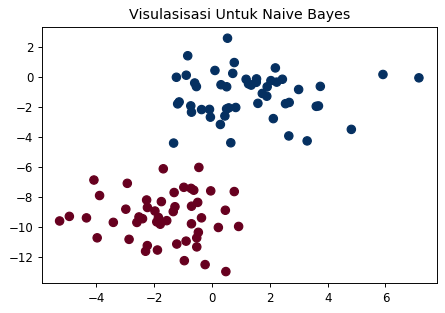

In [267]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

plt.title('Visulasisasi Untuk Naive Bayes')

### 2. Decision Tree Classifier

Yang kedua kita akan menerapkan Decision Tree untuk melakukan klasifikasi data pada dataset yang kita miliki. Decision Tree merupakan metode klasifikasi yang menerapkan struktur pohon.

In [184]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=5)

model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Setelahnya dilakukan evaluasi model terhadap data decision tree yang dimiliki.

In [207]:
y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        80
           1       0.95      0.96      0.95       148

    accuracy                           0.94       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



Selanjutnya akan dilakukan visualisasi terdahap dataset yang dimiliki dengan mengggunakan decision tree.

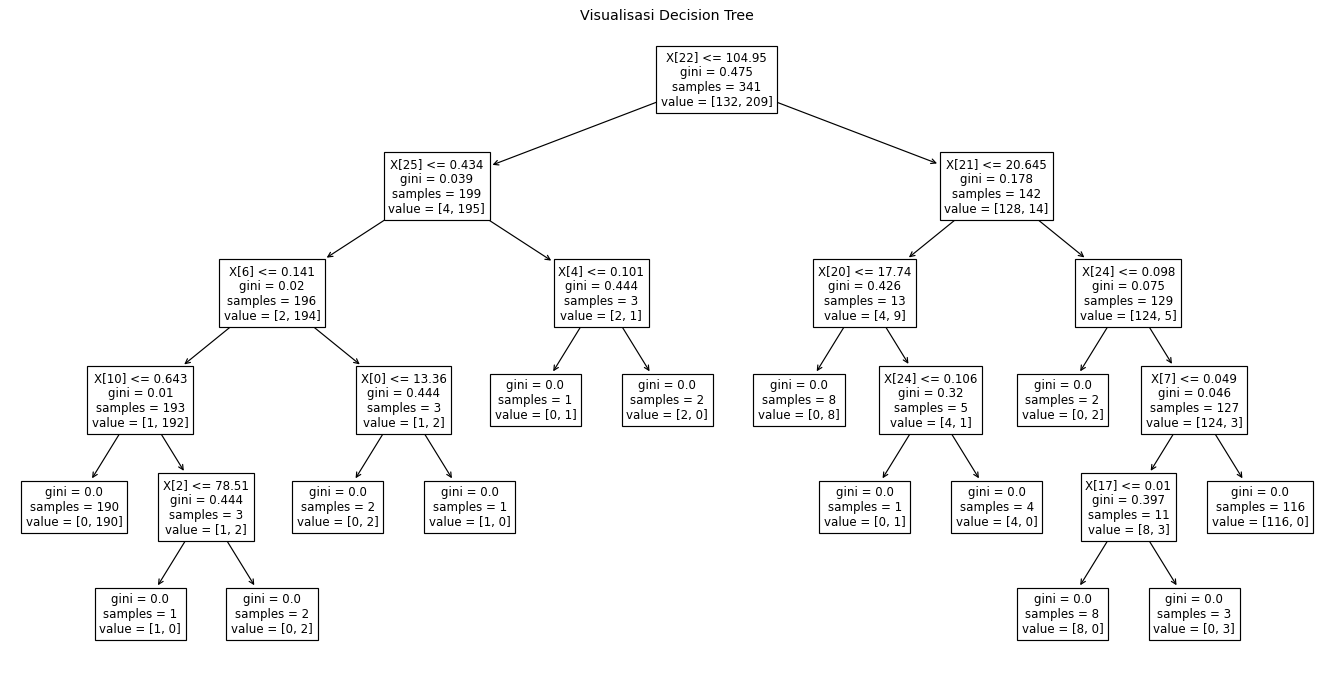

In [265]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(20, 10))
tree.plot_tree(model2, fontsize=10)

plt.title('Visualisasi Decision Tree')
plt.show()

Pada hasil diatas dapat diketahui jumlah:

* Root Node = 1
* Internal Node = 12
* Leaf Node = 14

Penjelasan:
* Root Node: Menempati posisi paling atas
* Leaf Node: Merepresentasikan prediksi class yang dihasilkan dari struktur tree tersebut
* Internal Node: Berada diantara leaf dan root

Dan dapat dilihat jumlah kedalamannya adalah 5 / tingkat pertanyaannya maksimal adalah 5.

### 3. Random Forest Classifier

Yang ketiga adalah akan diterapkan Random Forest Classifier, Random Forest merupakan salah satu bentuk implementasi dari Homogeneous Ensamble Learning yang menerapkan Decision Tree.

In [189]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, 
                               random_state=0)

model3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Selanjutnya akan dilakukan visualisasi terdahap dataset yang dimiliki dengan mengggunakan Random Forest.

In [206]:
y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        80
           1       0.94      0.97      0.96       148

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



### 4. Support Vector Machine

Yang keempat kita akan menerapkan Support Vector Machine (SVM).

In [257]:
from sklearn.svm import SVC

model4 = SVC(random_state=0, probability=True, kernel = 'linear')
model4.fit(X_test, y_test)
print(model4.score(X_test, y_test))

0.9780701754385965


Selanjutnya akan dilakukan visualisasi terdahap dataset yang dimiliki dengan mengggunakan SVM.

In [245]:
y_pred4 = model4.predict(X_test)

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        80
           1       0.91      0.97      0.94       148

    accuracy                           0.92       228
   macro avg       0.92      0.89      0.91       228
weighted avg       0.92      0.92      0.92       228



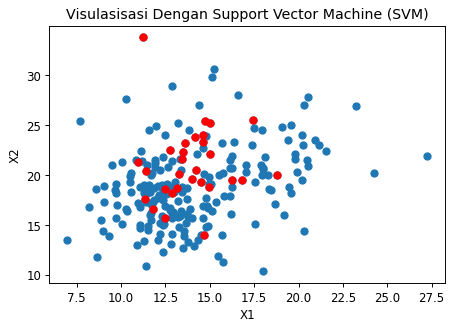

In [261]:
support_vectors = model4.support_vectors_
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')

plt.title('Visulasisasi Dengan Support Vector Machine (SVM)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5. Binary Classification dengan Logistic Regression

Yang terakhir adalah kita akan menggunakan Binary Classification dengan Logictic Regression.

In [246]:
from sklearn.linear_model import LogisticRegression

model5 = LogisticRegression()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

for pred, breast_cancer in zip(y_pred5[:5], X_test[:5]):
    print(f'PRED: {pred} - breast_cancer: {breast_cancer}\n')

PRED: 1 - breast_cancer: [1.469e+01 1.398e+01 9.822e+01 6.561e+02 1.031e-01 1.836e-01 1.450e-01
 6.300e-02 2.086e-01 7.406e-02 5.462e-01 1.511e+00 4.795e+00 4.945e+01
 9.976e-03 5.244e-02 5.278e-02 1.580e-02 2.653e-02 5.444e-03 1.646e+01
 1.834e+01 1.141e+02 8.092e+02 1.312e-01 3.635e-01 3.219e-01 1.108e-01
 2.827e-01 9.208e-02]

PRED: 0 - breast_cancer: [1.317e+01 1.866e+01 8.598e+01 5.346e+02 1.158e-01 1.231e-01 1.226e-01
 7.340e-02 2.128e-01 6.777e-02 2.871e-01 8.937e-01 1.897e+00 2.425e+01
 6.532e-03 2.336e-02 2.905e-02 1.215e-02 1.743e-02 3.643e-03 1.567e+01
 2.795e+01 1.028e+02 7.594e+02 1.786e-01 4.166e-01 5.006e-01 2.088e-01
 3.900e-01 1.179e-01]

PRED: 1 - breast_cancer: [1.295e+01 1.602e+01 8.314e+01 5.137e+02 1.005e-01 7.943e-02 6.155e-02
 3.370e-02 1.730e-01 6.470e-02 2.094e-01 7.636e-01 1.231e+00 1.767e+01
 8.725e-03 2.003e-02 2.335e-02 1.132e-02 2.625e-02 4.726e-03 1.374e+01
 1.993e+01 8.881e+01 5.854e+02 1.483e-01 2.068e-01 2.241e-01 1.056e-01
 3.380e-01 9.584e-02]

PRED

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selanjutnya akan dilakukan visualisasi terdahap dataset yang dimiliki dengan mengggunakan Binary Classification.

In [247]:
y_pred5 = model5.predict(X_test)

print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        80
           1       0.95      0.96      0.96       148

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



Selanjutnya kita akan memvisualisasikannya dengna menggunakan Confusion Matrix.

In [248]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 74,   6],
       [  7, 141]], dtype=int64)

In [249]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 74
FP: 6
FN: 7
TP: 141


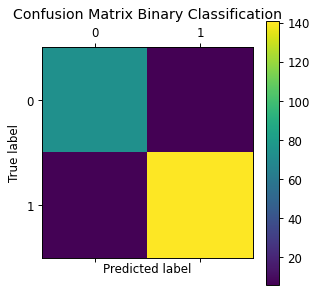

In [263]:
plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix Binary Classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Visualisasi Perbandingan Model Classification

Setelah melakukan perbandingan terhadap kelima model classification yang digunakan, maka kita akan memvisualisasikan perbandingannya dengan menggunakan Receiver Operating Characteristic (ROC).

ROC menawarkan visualisasi terhadap performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR).

Berdasarkan hasil dari ROC Curve, dapat disimpulkan:
* Jika plotting semakin mengarah ke kiri atas maka performanya / modelnya dinilai semakin baik
* Jika plotting semakin mengarah ke kanan bawah maka performanya / modelnya dinilai semakin buruk

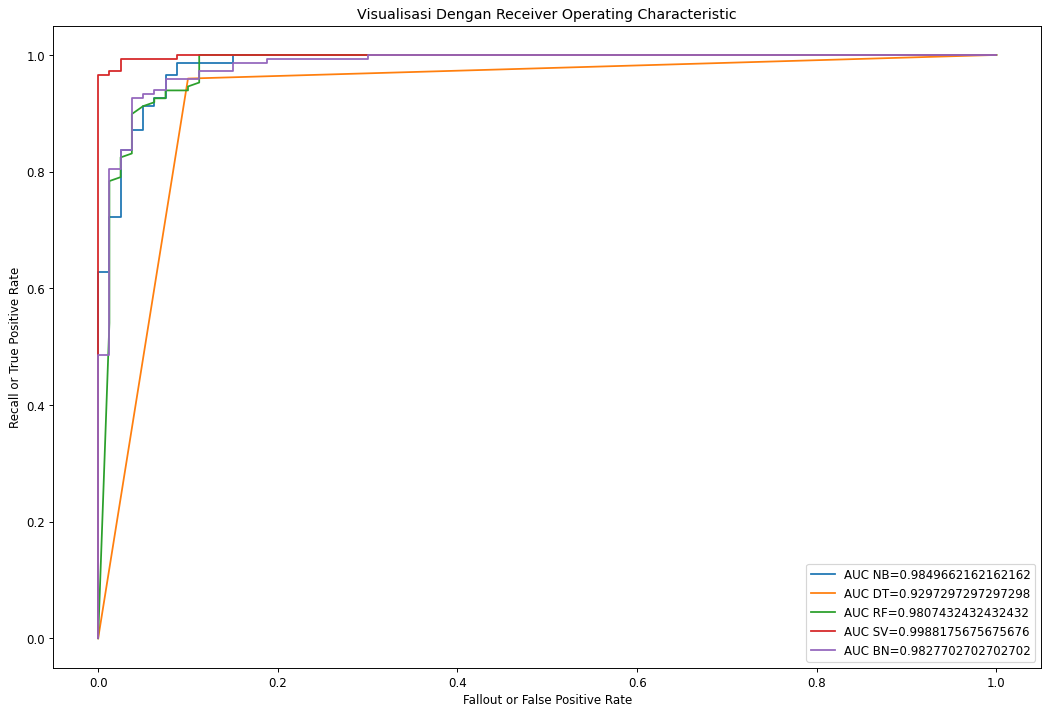

In [269]:
from sklearn.metrics import roc_curve, auc

nb = model1.predict_proba(X_test)
dt = model2.predict_proba(X_test)
rf = model3.predict_proba(X_test)
sv = model4.predict_proba(X_test)
bn = model5.predict_proba(X_test)

fpr1, tpr1, threshhold1 = roc_curve(y_test, nb[:, 1])
fpr2, tpr2, threshhold2 = roc_curve(y_test, dt[:, 1])
fpr3, tpr3, threshhold3 = roc_curve(y_test, rf[:, 1])
fpr4, tpr4, threshhold4 = roc_curve(y_test, sv[:, 1])
fpr5, tpr5, threshhold5 = roc_curve(y_test, bn[:, 1])

nb_auc = auc(fpr1, tpr1)
dt_auc = auc(fpr2, tpr2)
rf_auc = auc(fpr3, tpr3)
sv_auc = auc(fpr4, tpr4)
bn_auc = auc(fpr5, tpr5)

plt.figure(figsize = (15, 10))

plt.plot(fpr1, tpr1, '-', label=f'AUC NB={nb_auc}')
plt.plot(fpr2, tpr2, '-', label=f'AUC DT={dt_auc}')
plt.plot(fpr3, tpr3, '-', label=f'AUC RF={rf_auc}')
plt.plot(fpr4, tpr4, '-', label=f'AUC SV={sv_auc}')
plt.plot(fpr5, tpr5, '-', label=f'AUC BN={bn_auc}')

plt.title('Visualisasi Dengan Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()